## Lesson 10:
### Exercise 1: Planning a telescope observation

In [150]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as scipy
from scipy import stats
from tqdm.notebook import tqdm
import seaborn as sns
import astroML.stats
%config InlineBackend.figure_format='retina'
c = sns.color_palette('rocket', 5)

We can define the Markov chain as a list of **0**s and **1**s.

- **"0"**: It's a **cloudy** day
- **"1"**: It's a **sunny** day

Keep in mind that:
- $$p({\rm sunny \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$
- $$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$
---
- $$p({\rm cloudy \; tomorrow} \, |\, {\rm sunny \; today}) = 0.1,$$
- $$p({\rm sunny \; tomorrow} \, |\, {\rm sunny \; today}) = 0.9.$$

We want to recover to the theoretical probability of having a sunny day, which is

$$p(sunny)=0.83$$


In [3]:
# Define the "cloudy" and "sunny" states
cloudy = 0
sunny = 1

In [41]:
# --------------- Functions ----------------- #
def next_step_choice(guess):
    p = np.random.random() # Draw a random number from 0 to 1
    if guess == cloudy:
        if p < 0.5:
            next_step = sunny 
            guess = np.copy(next_step)
        else:
            next_step = cloudy
            guess = np.copy(next_step)
    else:
        if p < 0.9:
            next_step = sunny
            guess = np.copy(next_step)
        else:
            next_step = cloudy
            guess = np.copy(next_step)
    return next_step

def weather_prob (N, guess):
    counter = 0 # Counter variable for the number of sunny days
    for n in np.arange(1, N):
        next_ = next_step_choice(guess)
        guess = next_
        if next_ == 1:
            counter += 1                  
    return counter/N

def trace_list (N, guess):
    counter = 0
    sunnyprob_list = []
    for n in tqdm(np.arange(1, N)):
        next_ = next_step_choice(guess)
        guess = next_
        if next_ == 1:
            counter += 1
        sunnyprob_list.append(counter/n)
    return sunnyprob_list

### Exploring Markov chain length

We can start by estimating the probability of having a "sunny day" with two different initial states: "The first day is a **cloudy day**" and "The first day is a **sunny day**".
We repeat this for a high number of "chain lenghts", 100 values from $10^2$ to $10^5$, equally spaced in logarithmic scale.

The longer the chain, the less the **burn in** phase matters in the computation of the sunny-probability, and we get closer and closer to the expected probability $p(sunny)=0.83$.

Notice also how the probability we get is not affected by the choice of the initial state. That would influence the first part of the chain, for sure, but then after a while we just approach $0.83$, no matter where we started from.

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

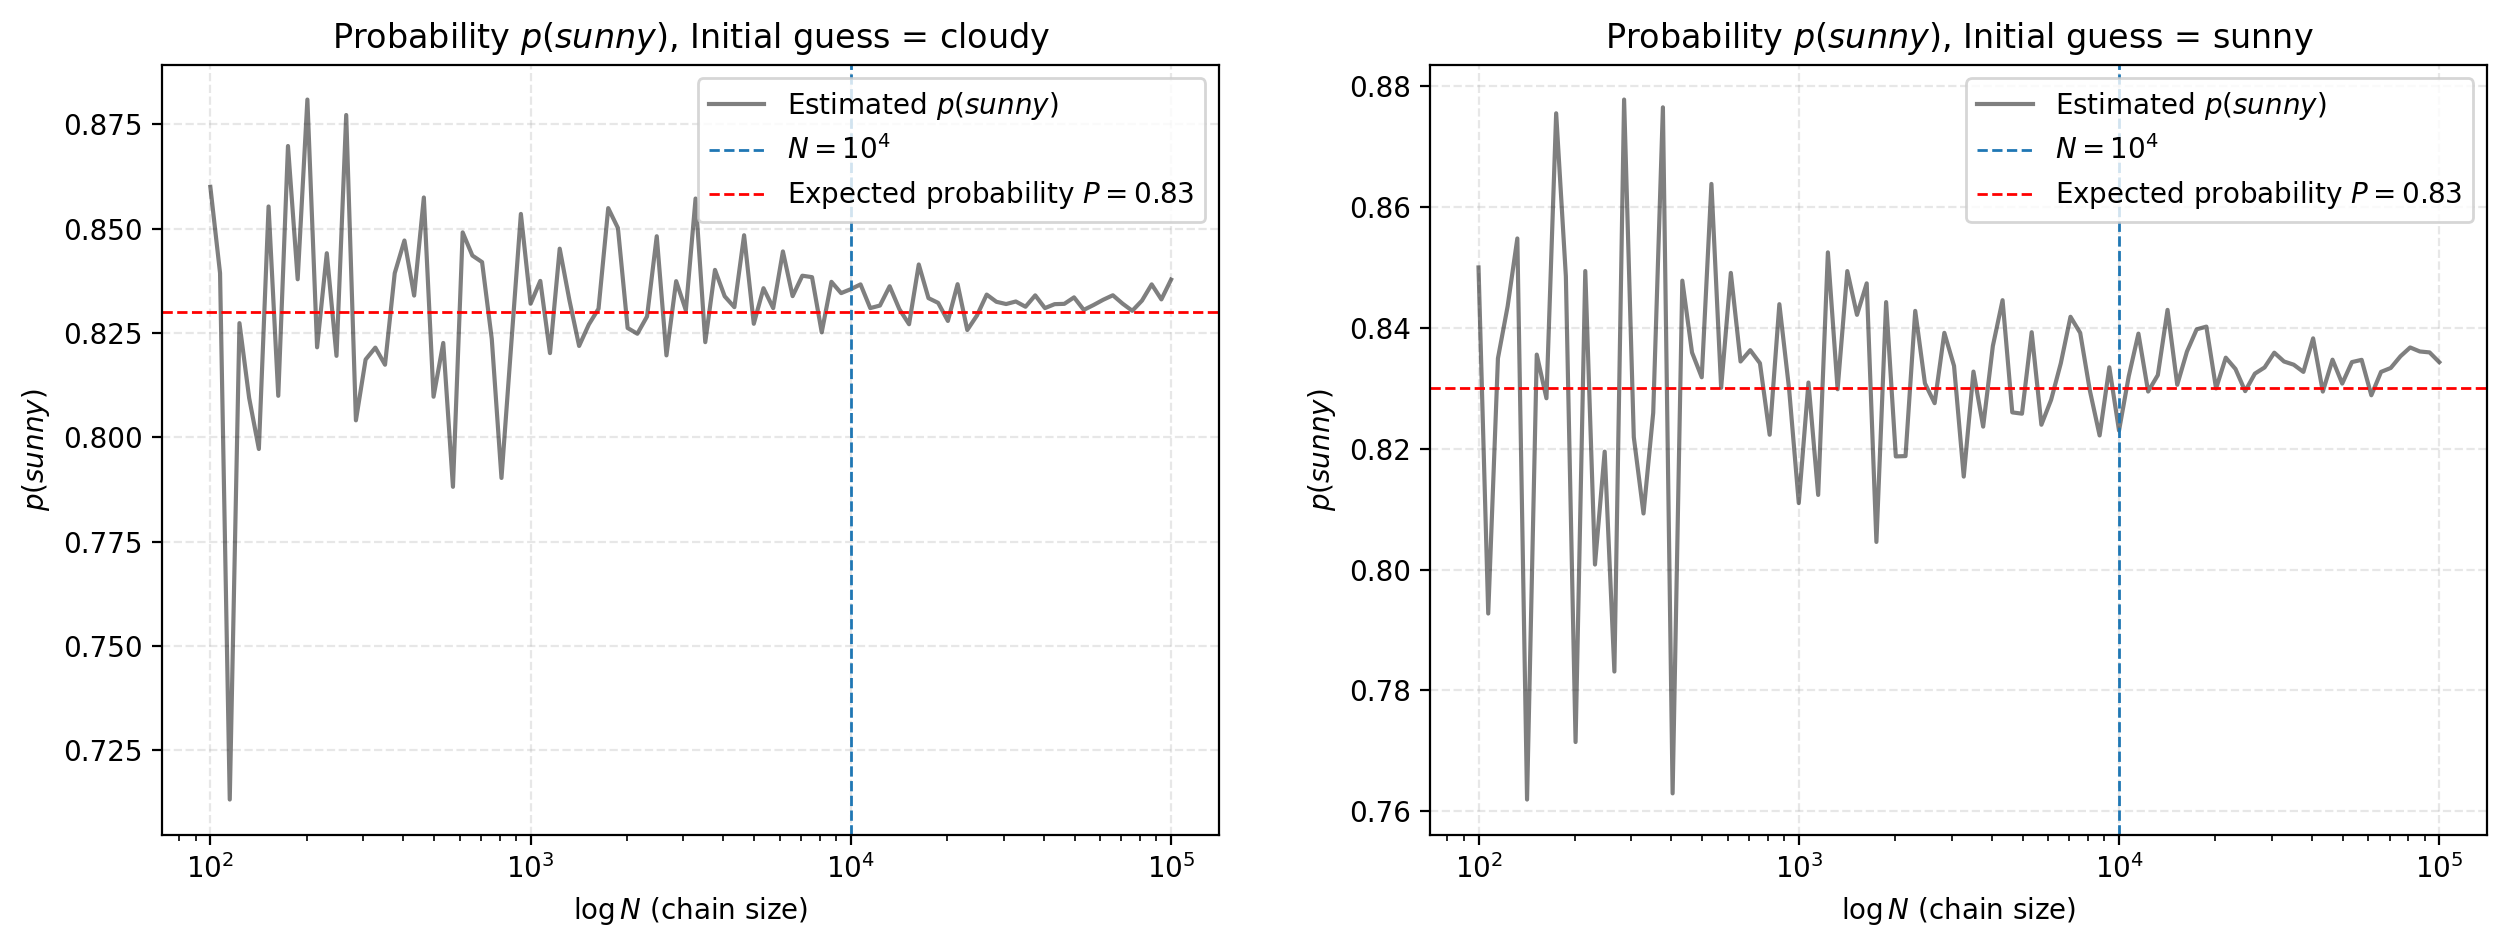

In [38]:
fig = plt.figure(figsize = (15,5))

#--------------------------------------------------------------------------------------
initial_guess = 0 # I start with a cloudy day
ax = fig.add_subplot(121)
sunny_prob_cloudy = []

for N in tqdm(np.logspace(2, 5, num = 100)):
    sunny_prob = weather_prob(N, initial_guess)
    sunny_prob_cloudy.append(sunny_prob)
    
ax.plot(np.logspace(2, 5, num = 100), sunny_prob_cloudy, c='black', alpha=0.5, label=r'Estimated $p(sunny)$')
ax.set_title(f'Probability $p(sunny)$, Initial guess = cloudy')
ax.axvline(1e4, lw = 1, ls='--', label = f'$N = 10^4$')
ax.axhline(0.83, lw = 1, ls='--', label = f'Expected probability $P = 0.83$', c='r')
ax.set_xscale('log')
ax.legend()
ax.grid(ls='--', alpha=0.3)
ax.set_ylabel(r'$p(sunny)$')
ax.set_xlabel(r'$\log{N}$ (chain size)')

#---------------------------------------------------------------------------------------
initial_guess = 1 #I start with a sunny day
ax = fig.add_subplot(122)
sunny_prob_sunny = []

for N in tqdm(np.logspace(2, 5, num = 100)):
    sunny_prob = weather_prob(N, initial_guess)
    sunny_prob_sunny.append(sunny_prob)

ax.plot(np.logspace(2, 5, num = 100), sunny_prob_sunny, c='black', alpha=0.5, label=r'Estimated $p(sunny)$')
ax.set_title(f'Probability $p(sunny)$, Initial guess = sunny')
ax.axvline(1e4, lw = 1, ls='--', label = f'$N = 10^4$')
ax.axhline(0.83, lw = 1, ls='--', label = f'Expected probability $P = 0.83$', c='r')
ax.set_xscale('log')
ax.grid(ls='--', alpha=0.3)
ax.set_ylabel(r'$p(sunny)$')
ax.set_xlabel(r'$\log{N}$ (chain size)')
ax.legend()

plt.show()

---

### Trace plot
Now we understood that the chain needs to be "long" enough, let's fix a chain lenght $N = 100000$ and repeat the process, keeping track of the probability as the chain is built up:

  0%|          | 0/19999 [00:00<?, ?it/s]

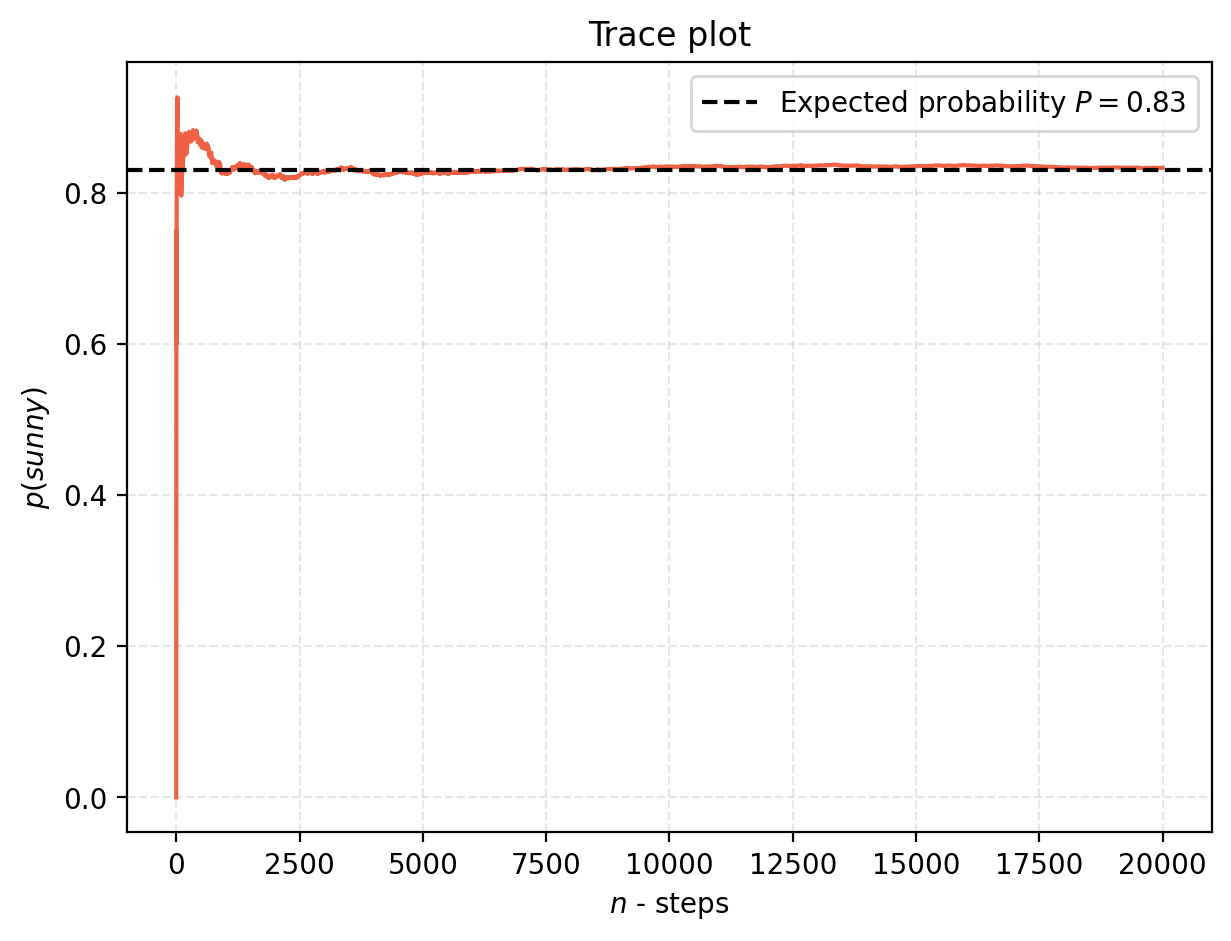

In [164]:
fig = plt.figure(figsize = (7,5))
ax = fig.add_subplot(111)

N = 20000
initial_guess = cloudy
list_prob = trace_list(N, initial_guess)

ax.plot(np.arange(1, N), list_prob, color=c[3])
ax.set_title('Trace plot')
ax.set_xlabel(f'$n$ - steps')
ax.set_ylabel(f'$p(sunny)$')
ax.axhline(0.83, color='black', ls='--', label = f'Expected probability $P = 0.83$')
ax.legend()
ax.grid(ls='--', alpha=0.3)

Text(0, 0.5, 'counts')

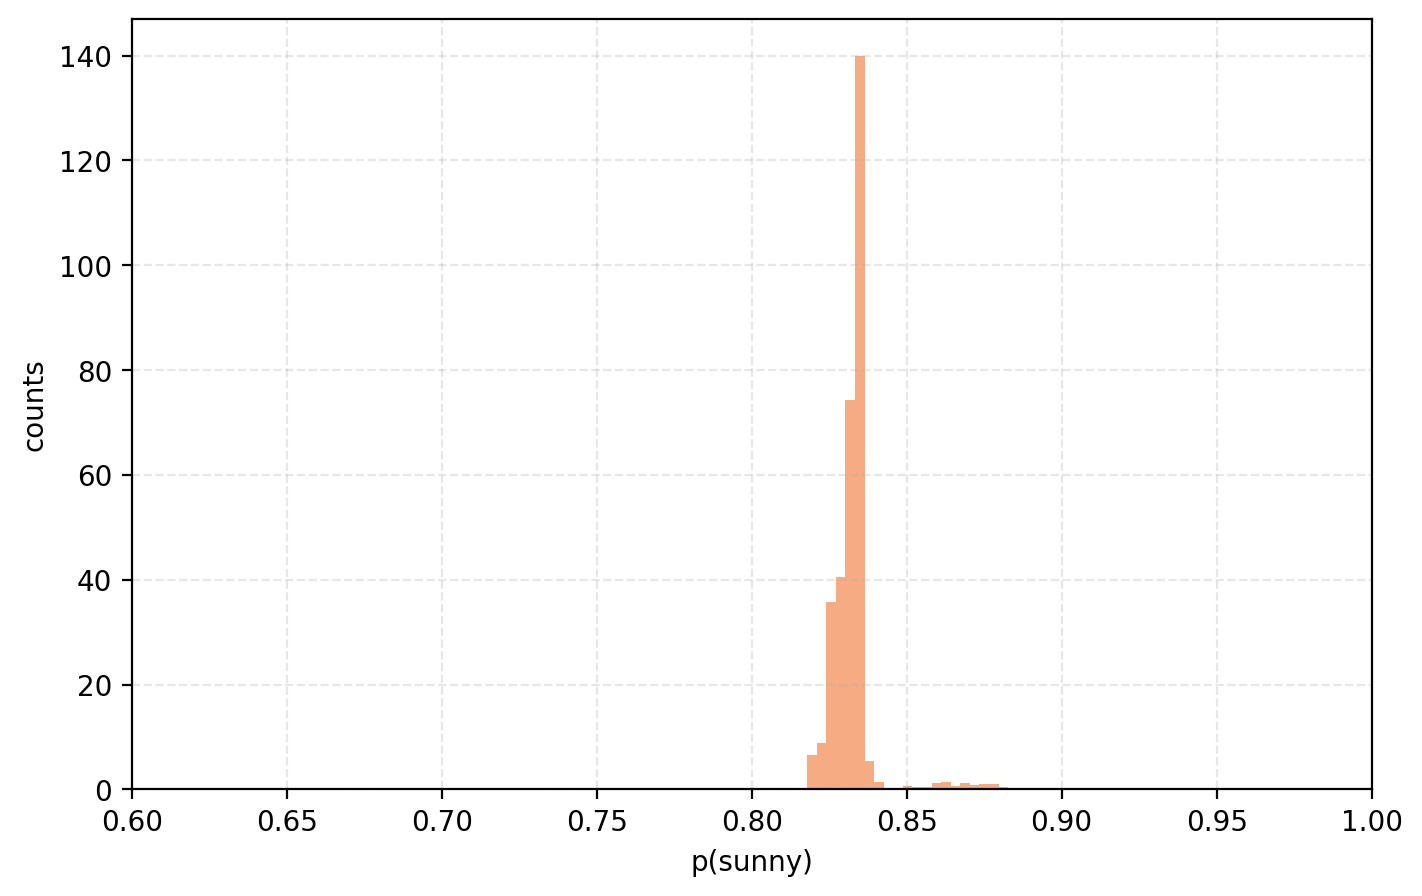

In [173]:
plt.hist(list_prob, bins=300, density=True, color=c[4]);
plt.xlim(0.60, 1);
plt.grid(ls='--', alpha=0.3)
plt.xlabel(r'p(sunny)')
plt.ylabel('counts')

Now let's remove a burn-in phase of, let's say, 2500 days:

Text(0, 0.5, 'counts')

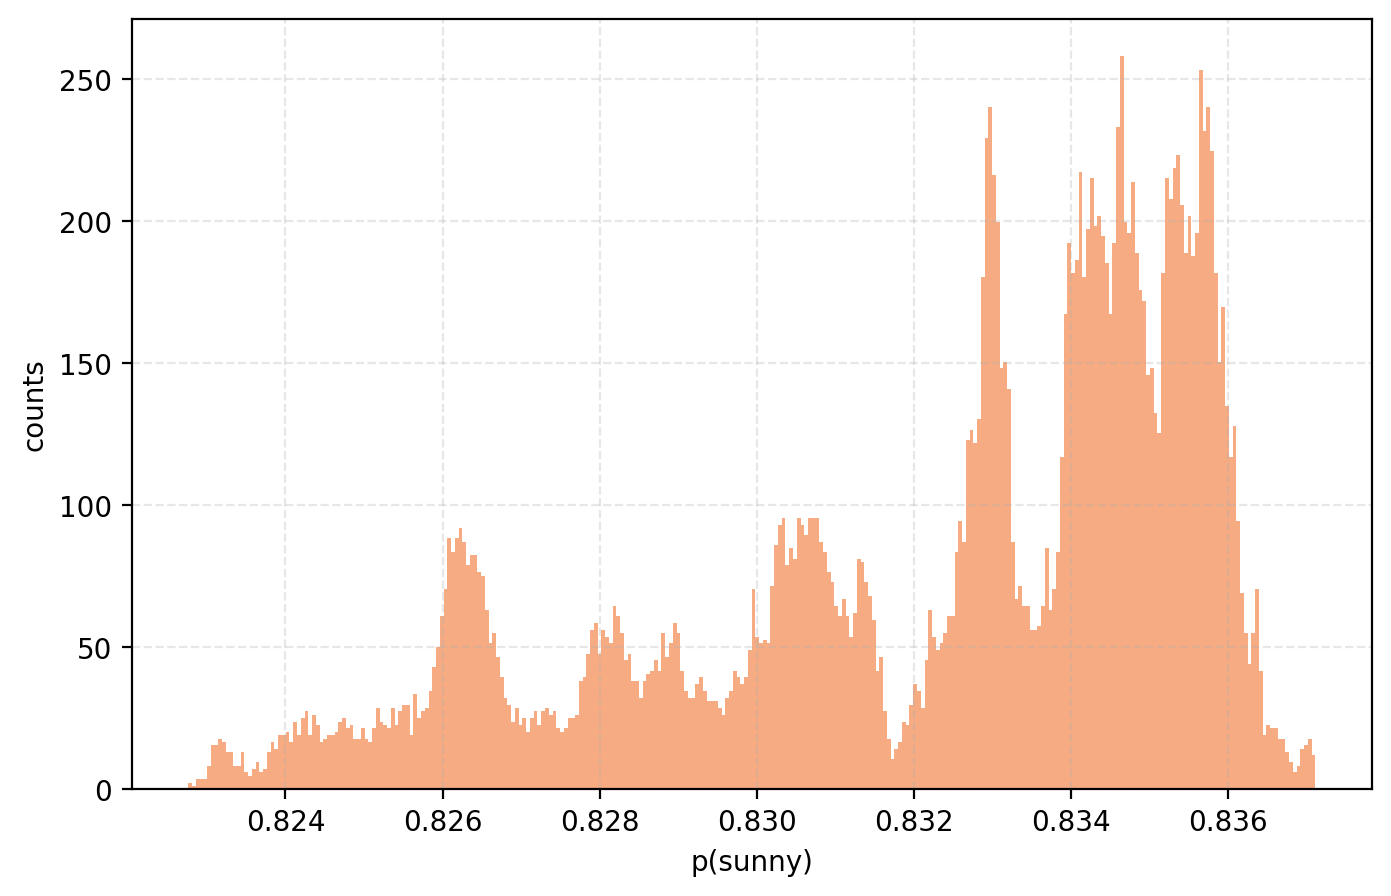

In [176]:
burnin = 2500
burnin_prob = list_prob[burnin:]
plt.hist(burnin_prob, bins=300, density=True, color=c[4]);
plt.grid(ls='--', alpha=0.3)
plt.xlabel(r'p(sunny)')
plt.ylabel('counts')

What can we do with this distribution? We can use simple cumulative statistics to give an estimate of $p(sunny)$ and its error.

In [171]:
prob_mean = np.mean(list_prob[burnin:])
print("The standard sample mean of the chain, without burn in, is: ", prob_mean)
prob_median = np.median(list_prob[burnin:])
print("The median of the chain, without burn in is: ", prob_median)

robust_mean, robust_std = astroML.stats.median_sigmaG(list_prob[burnin:])
print('A robust estimate of the mean value and std of p(sunny) is: %f +/- %f'%(robust_mean, robust_std))

The standard sample mean of the chain, without burn in, is:  0.8322162984522806
The median of the chain, without burn in is:  0.8332106812447435
A robust estimate of the mean value and std of p(sunny) is: 0.833211 +/- 0.003529


---
Now let's have a look at the distribution of the "sunny probability" for different choices of the burn-in phase.

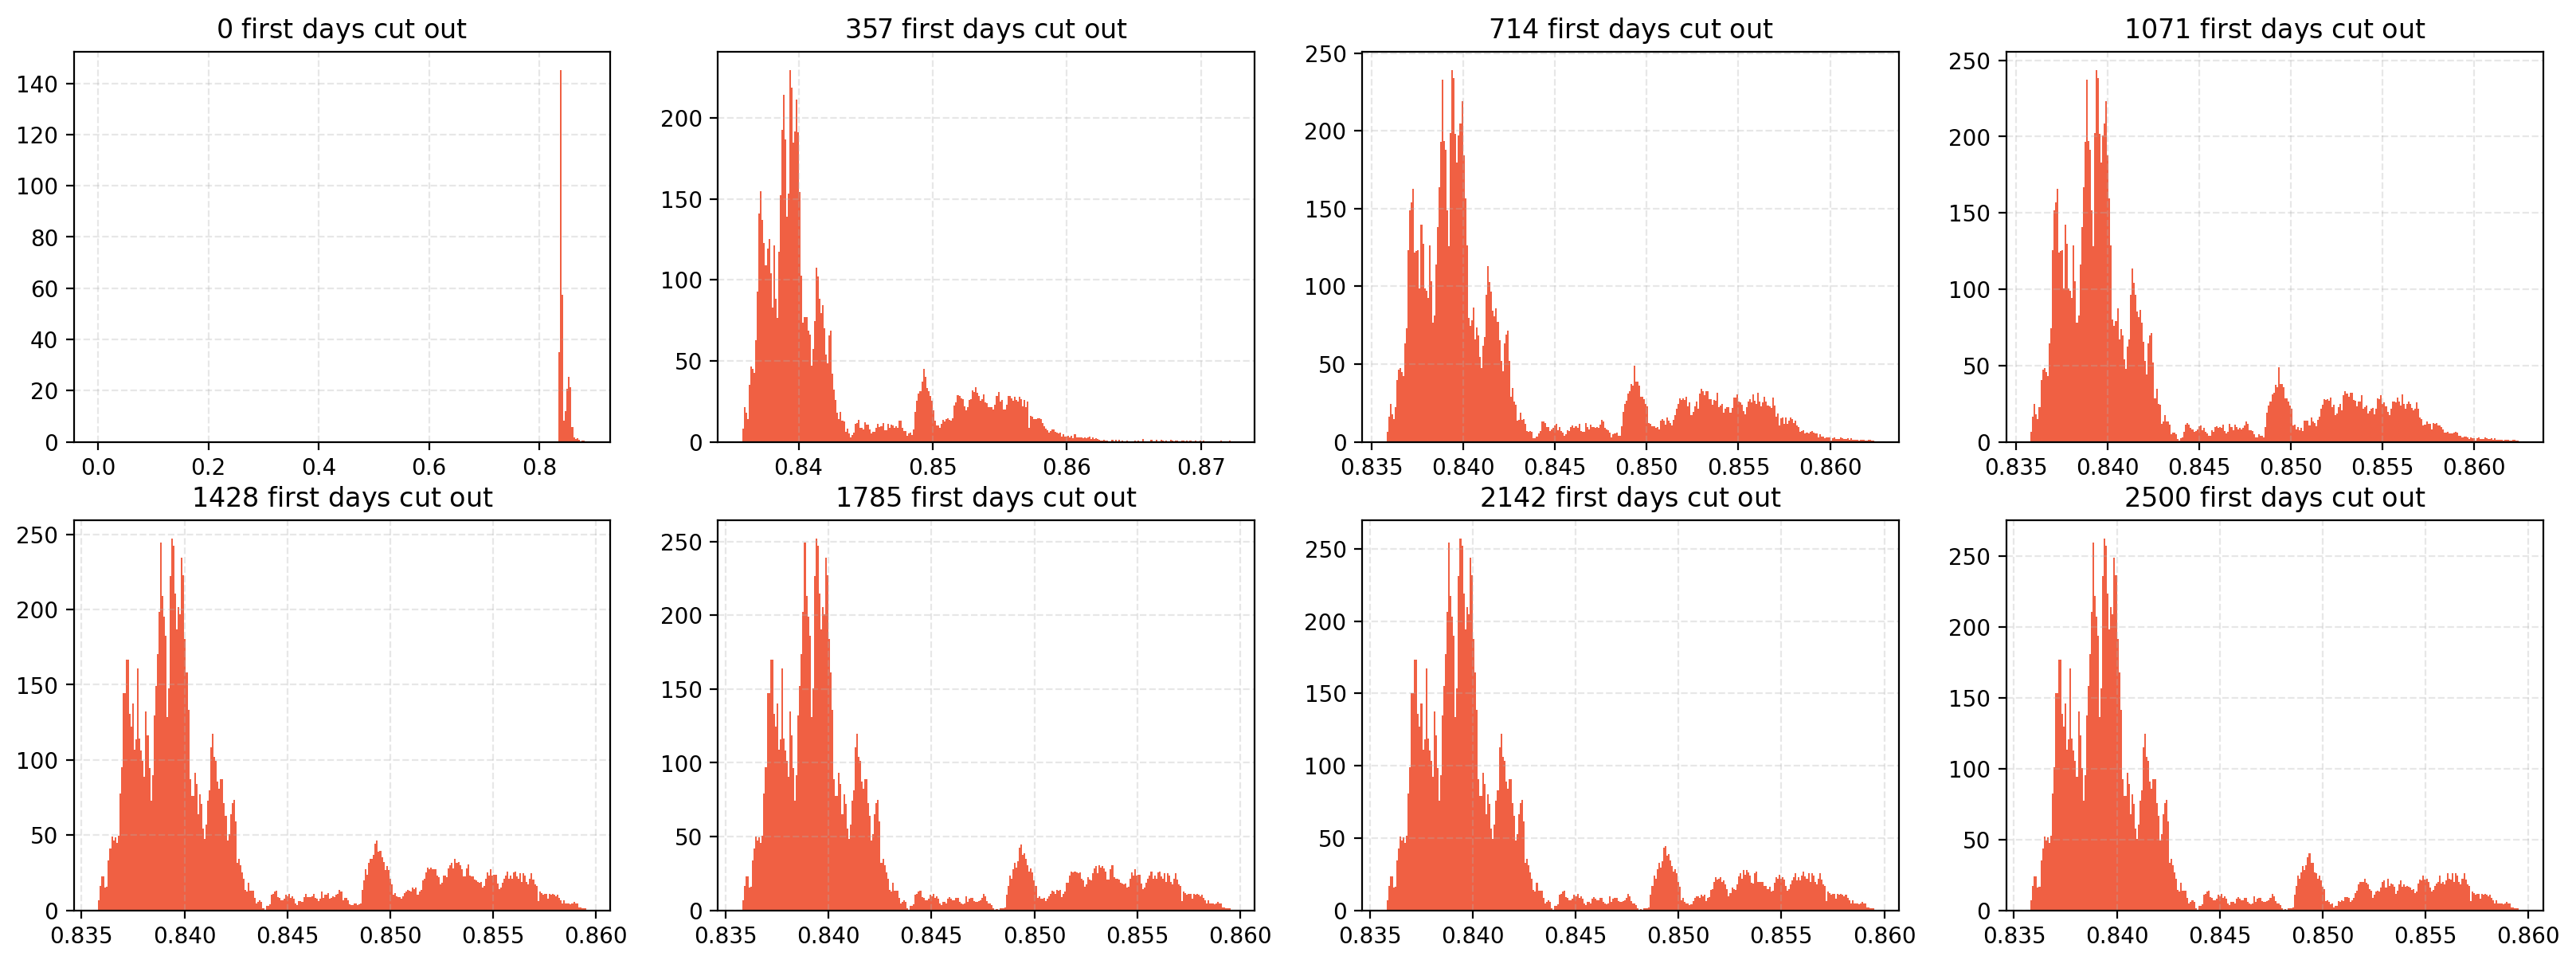

In [145]:
fig, ax = plt.subplots(2, 4, figsize=(20, 7))
for n, axes in zip(np.linspace(0, 2500, 8, dtype=int), ax.flatten()):
    axes.hist(list_prob[n:], bins=300, density=True, color=c[3])
    axes.grid(ls='--', alpha=0.3)
    axes.set_title(r'$%i$ first days cut out'%n)